### **Alternative Time Series Project - Sales**

In [2]:
import pandas as pd

df = pd.read_csv("sales.csv")
df.head(3)

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693


In [3]:
# Transforming data

df["date"] = pd.to_datetime(df.date)
df = df.set_index("date")
ts_total = df["sales"]
ts_total.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

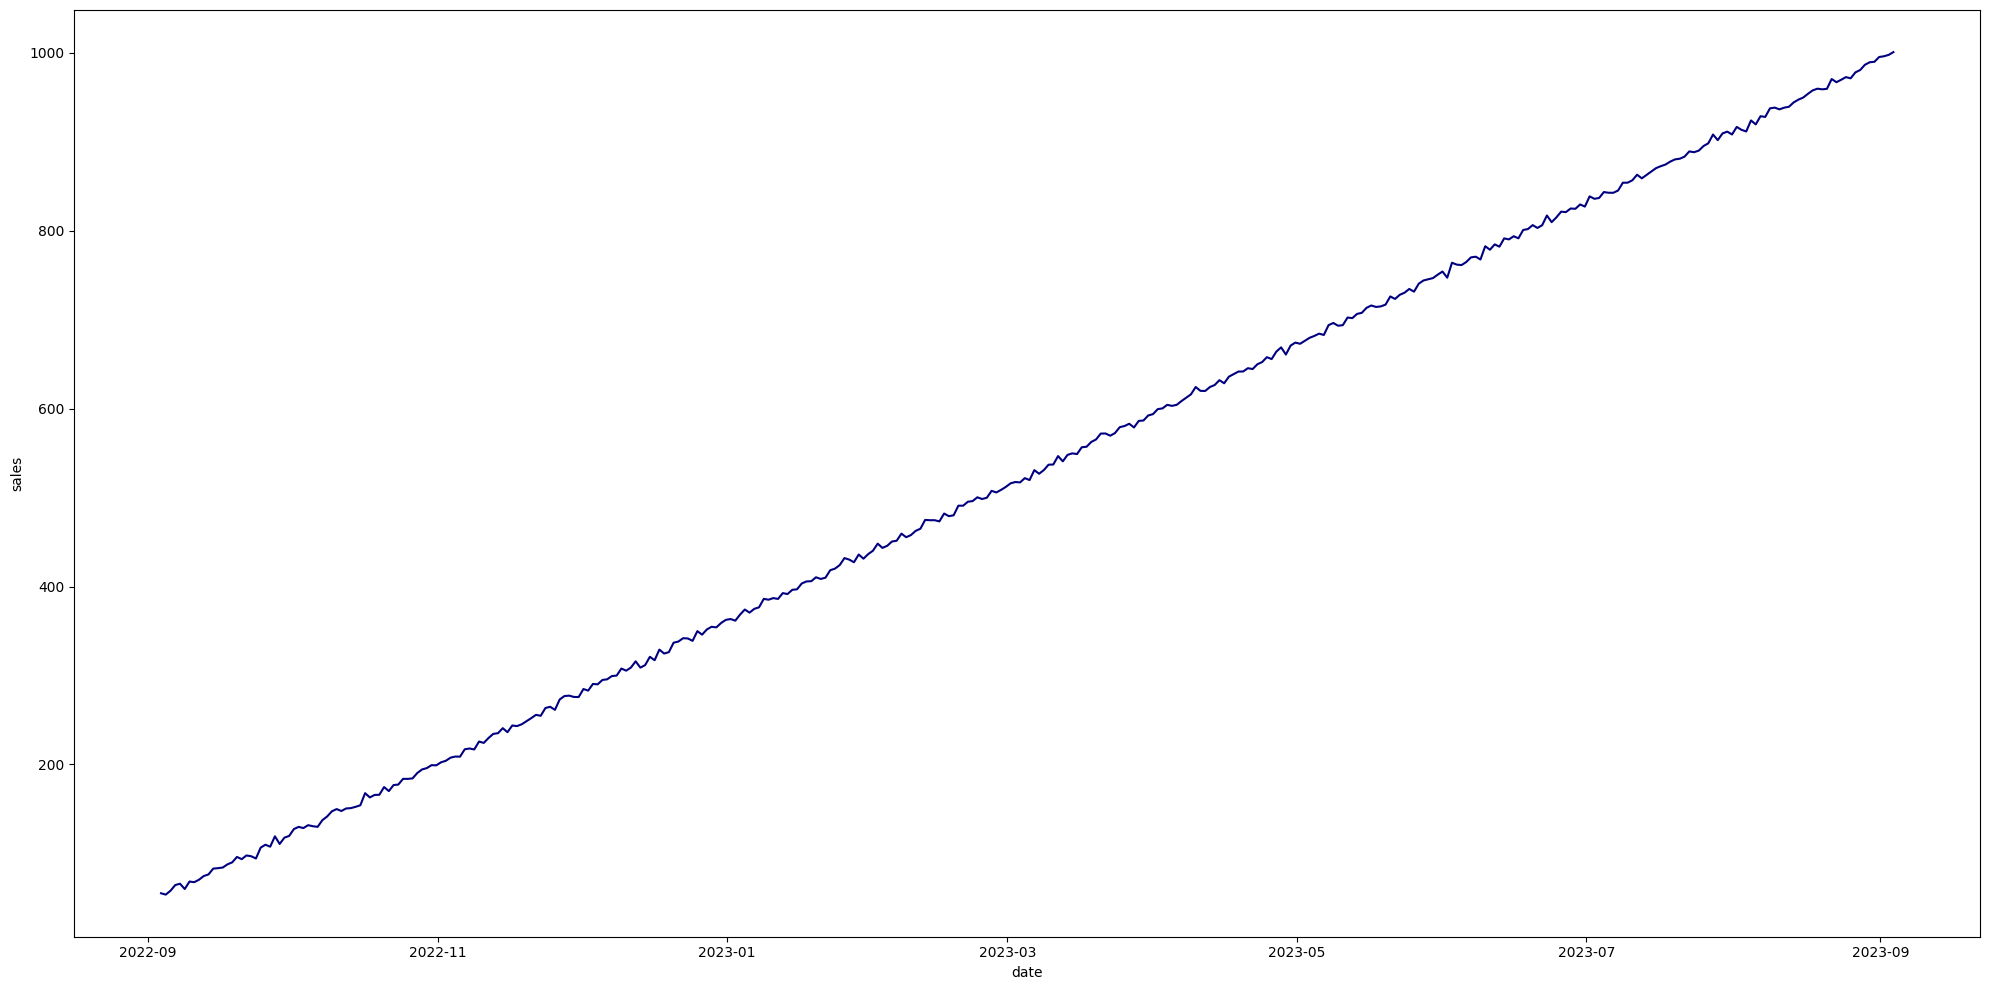

In [20]:
# Ploting the data

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (20, 10))

sns.lineplot(data = ts_total, color="navy")
plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, maxlag=None, regression='c', autolag='AIC'):
    """
    Perform the Augmented Dickey-Fuller test to check for stationarity of a time series.

    Parameters:
    timeseries (pd.Series): The time series to be tested.
    maxlag (int, optional): The maximum lag which is included in test, default is None.
    regression (str, optional): Constant and trend order to include in regression, default is 'c'.
    autolag (str, optional): Method to use when automatically determining the lag, default is 'AIC'.

    Returns:
    pd.Series: Test results including test statistic, p-value, number of lags used, number of observations used, and critical values.
    """
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, maxlag=maxlag, regression=regression, autolag=autolag)
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    return dfoutput

df_results = test_stationarity(ts_total, maxlag=12, regression='ct', autolag='BIC')
print(df_results)


Dickey-Fuller test results:
Test Statistic                 -19.897307
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    365.000000
Critical Value (1%)             -3.983789
Critical Value (5%)             -3.422587
Critical Value (10%)            -3.134164
dtype: float64


`p-value` is less than 0.05 so the series is not stationary, cancelling the null hypothesis, the data decomposition will proceed.

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_total, period= 7)
decomposition

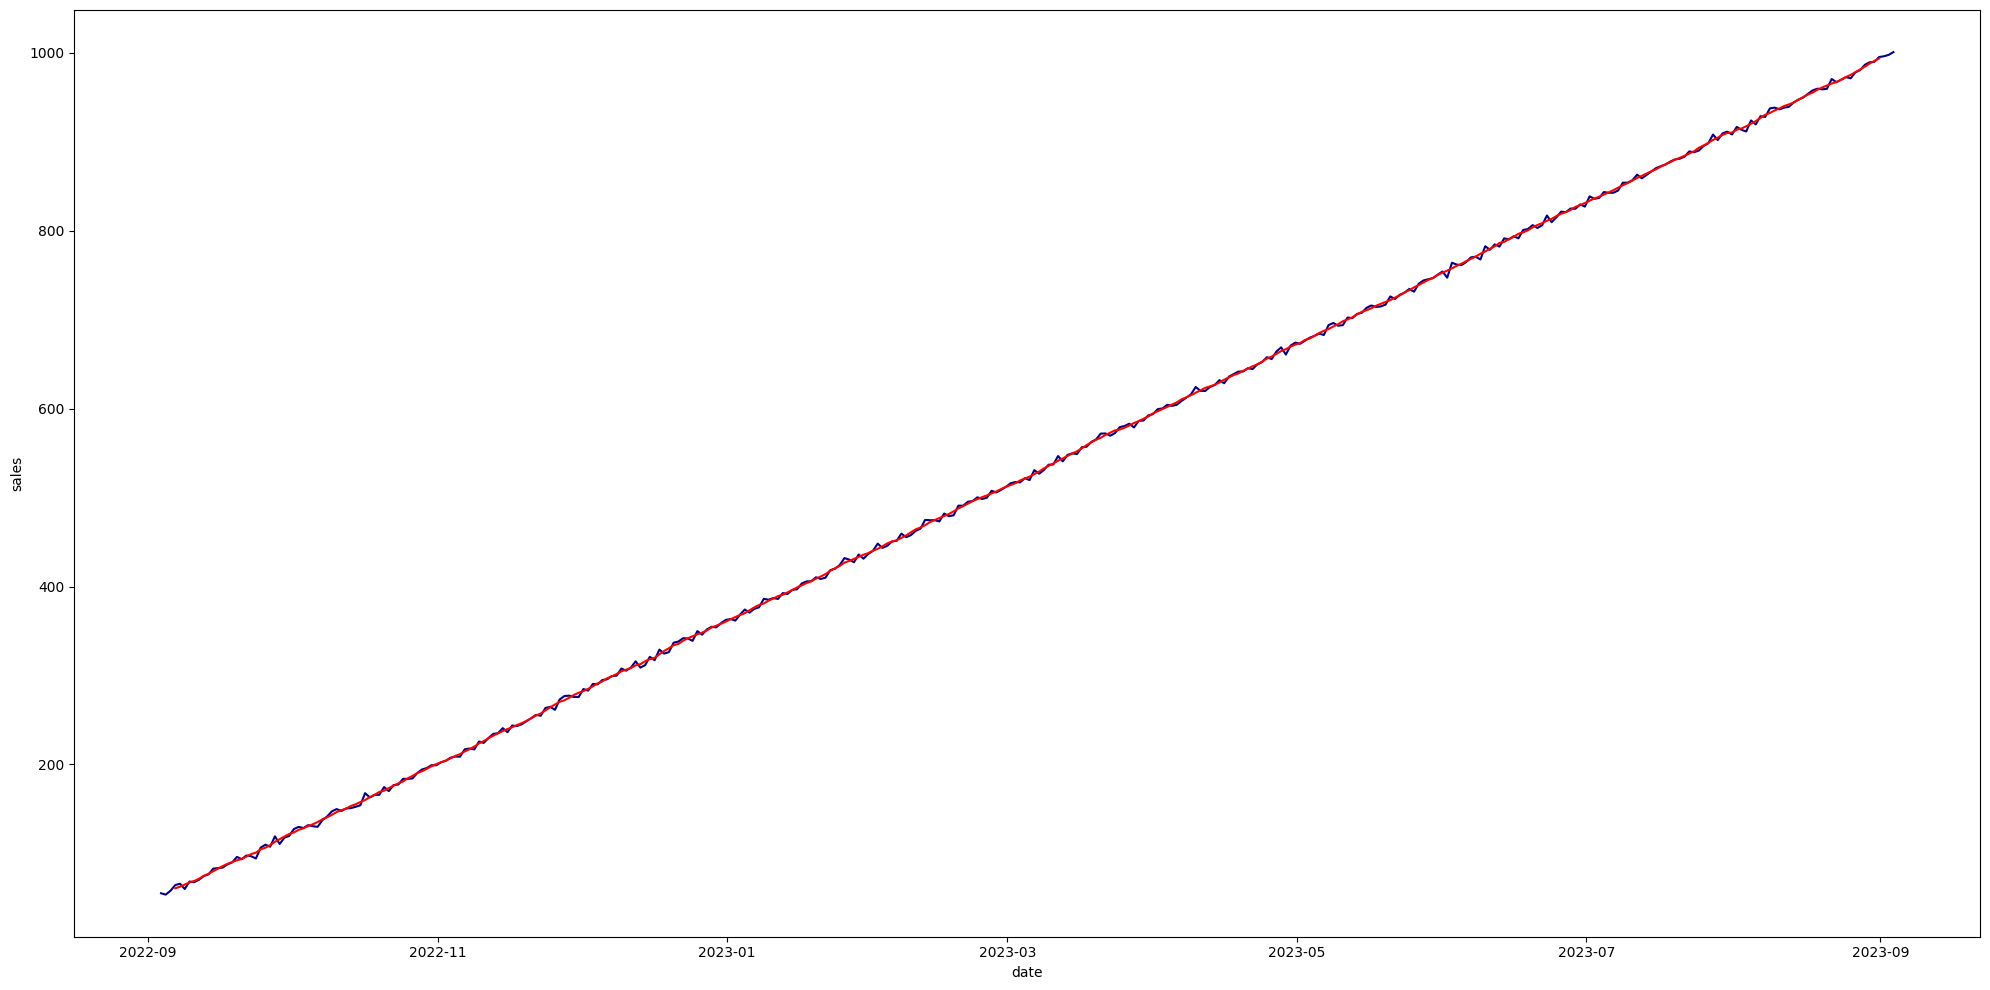

In [26]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (20, 10))

sns.lineplot(data = ts_total, color="navy")
sns.lineplot(data = trend, color="red")

plt.tight_layout()

plt.show()

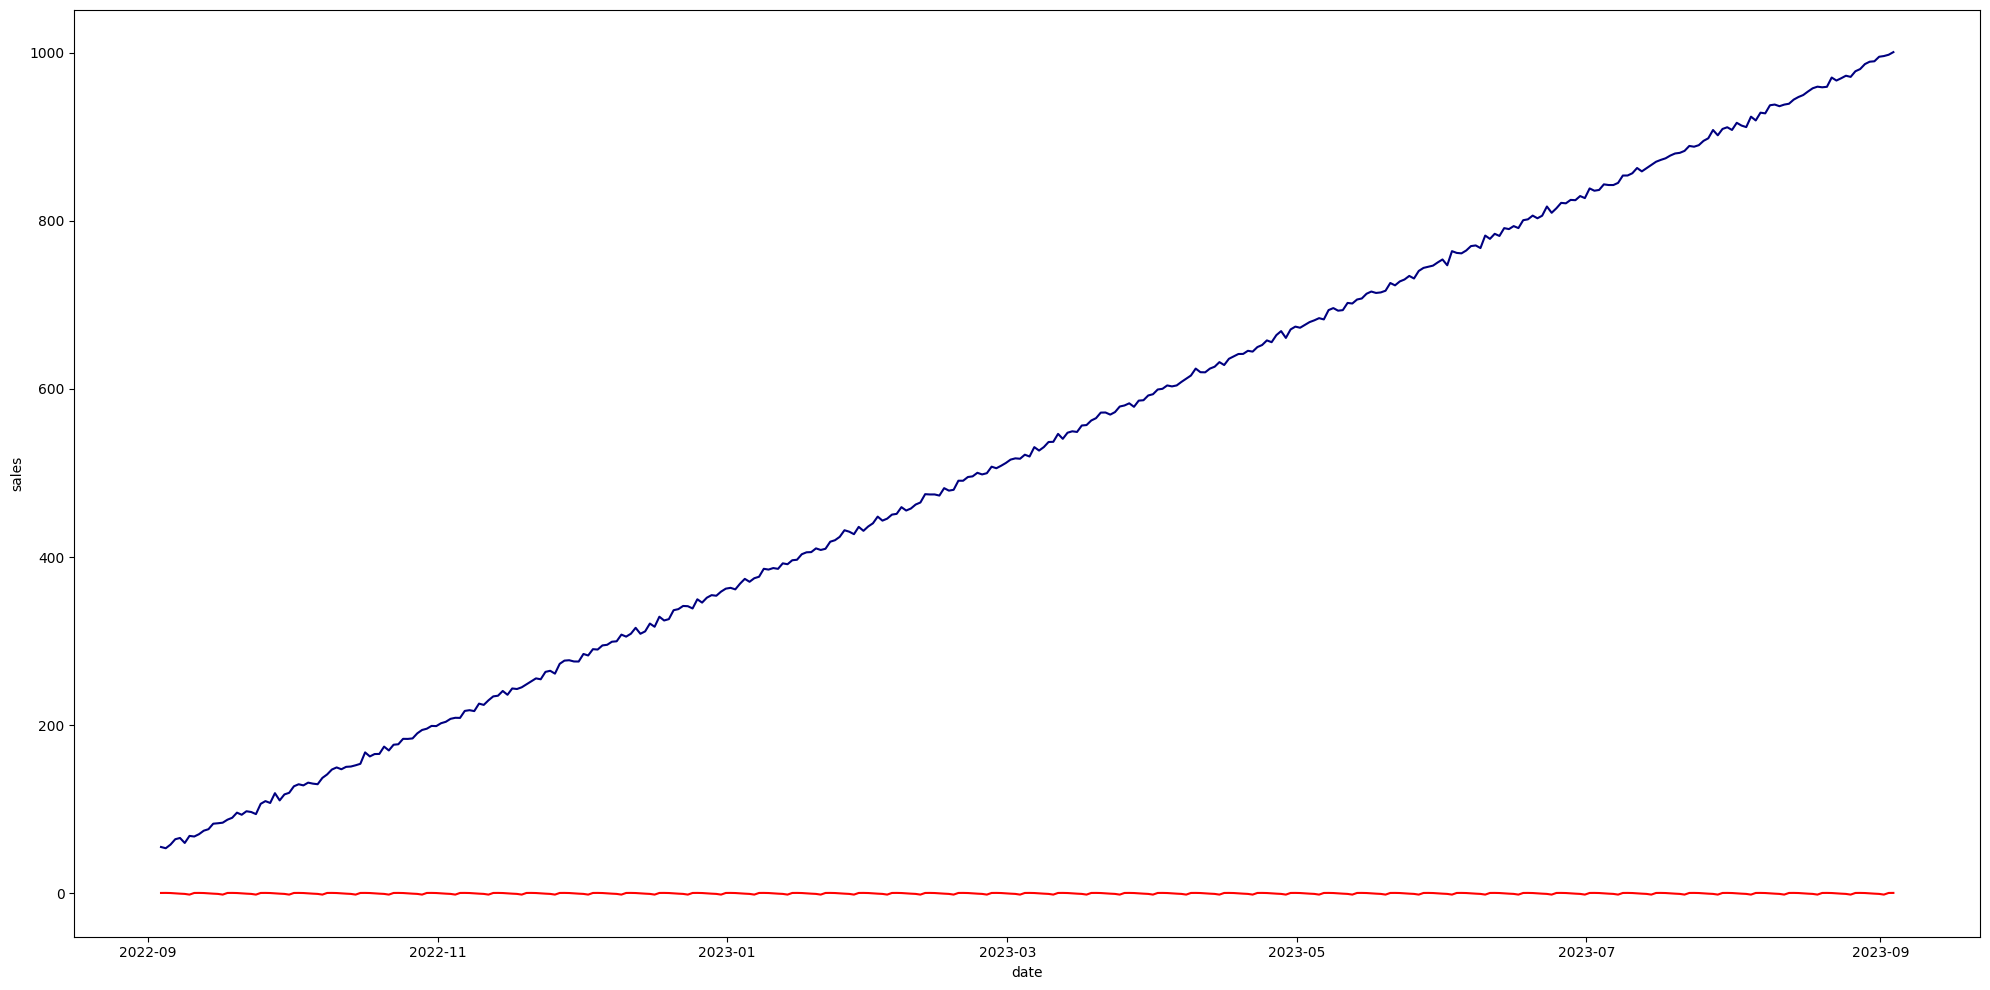

In [27]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (20, 10))

sns.lineplot(data = ts_total, color="navy")
sns.lineplot(data = seasonal, color="red")

plt.tight_layout()
plt.show()

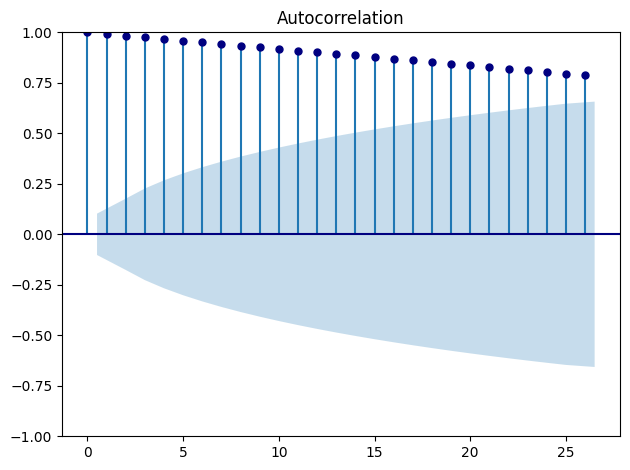

In [28]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts_total, color="navy")

plt.tight_layout()

plt.show()

In [31]:
# Training ARIMA

# ts_total time series
model = auto_arima(ts_total, 
                   seasonal=False, # Set as non-seasonal
                   trace=True, # To show the progress of the model fit
                   stepwise=True) # Uses a stepwise search for the best model

# Summary of the fitted model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=3.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=1.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=2.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=1.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.94 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=1.32 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 11.702 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  366


The best model is ARIMA(1, 1, 1)

In [32]:
# Predicting with the test set

forecast = model.predict(60)
forecast

2023-09-04 17:10:08.079328    1002.158118
2023-09-05 17:10:08.079328    1004.831639
2023-09-06 17:10:08.079328    1007.423258
2023-09-07 17:10:08.079328    1010.021597
2023-09-08 17:10:08.079328    1012.619384
2023-09-09 17:10:08.079328    1015.217217
2023-09-10 17:10:08.079328    1017.815046
2023-09-11 17:10:08.079328    1020.412876
2023-09-12 17:10:08.079328    1023.010705
2023-09-13 17:10:08.079328    1025.608534
2023-09-14 17:10:08.079328    1028.206364
2023-09-15 17:10:08.079328    1030.804193
2023-09-16 17:10:08.079328    1033.402023
2023-09-17 17:10:08.079328    1035.999852
2023-09-18 17:10:08.079328    1038.597681
2023-09-19 17:10:08.079328    1041.195511
2023-09-20 17:10:08.079328    1043.793340
2023-09-21 17:10:08.079328    1046.391170
2023-09-22 17:10:08.079328    1048.988999
2023-09-23 17:10:08.079328    1051.586828
2023-09-24 17:10:08.079328    1054.184658
2023-09-25 17:10:08.079328    1056.782487
2023-09-26 17:10:08.079328    1059.380317
2023-09-27 17:10:08.079328    1061

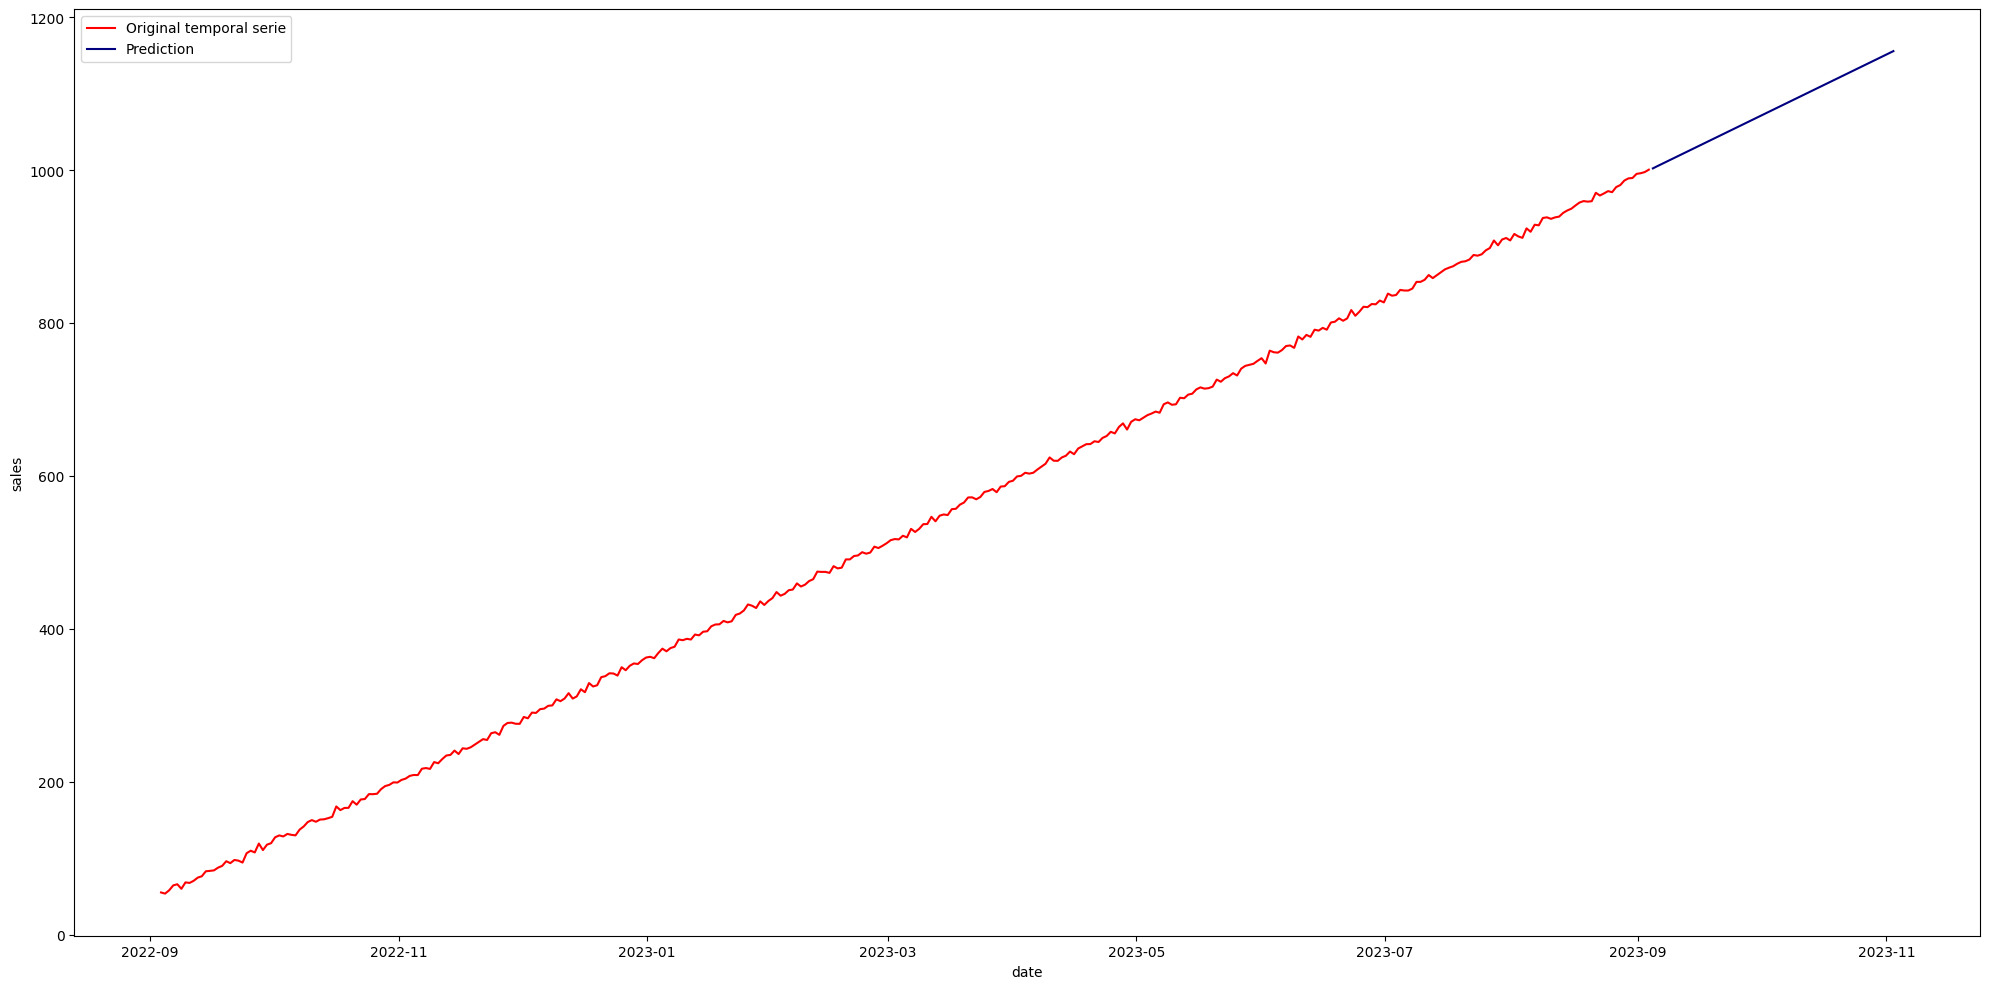

In [37]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (20, 10))

sns.lineplot(data = ts_total, c = "red",label="Original temporal serie")
sns.lineplot(data = forecast, c = "navy", label="Prediction")

plt.legend()
plt.tight_layout()

plt.show()